In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
from tensorflow import keras
from keras import layers, Input
from keras.models import Sequential, Model
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


IMG_HEIGHT=2444
IMG_WIDTH=1718


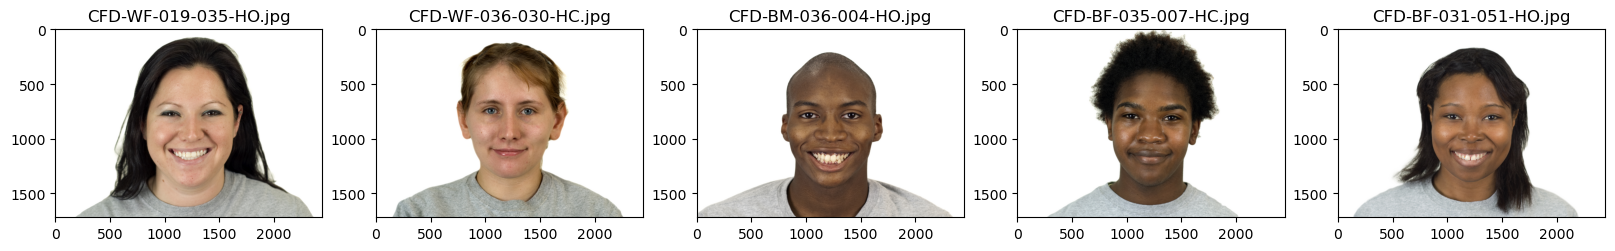

In [16]:
import random


plt.figure(figsize=(20,20))

hap_folder=r'C:\Users\arwen\OneDrive\Desktop\Face Base\Happy'
for i in range(5):
    file = random.choice(os.listdir(hap_folder))
    image_path= os.path.join(hap_folder, file)
    img=mpimg.imread(image_path)
    
    ax=plt.subplot(1,5,i+1)
    ax.set_title(file)
    plt.imshow(img)
    
    

In [17]:
def process_set(img_folder, image_array, name):

    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1, file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image=np.array(image)
            image= image.astype('float32')
            image /= 255
            image_array.append(image)
            name.append(dir1)



In [18]:
folder=r'C:\Users\arwen\OneDrive\Desktop\Face Base'
img_array=[]
name=[]

process_set(folder, img_array, name)


dictionary={k: v for v, k in enumerate(np.unique(name))}
dictionary 
{'Happy': 0, 'Sad': 1, 'Surprised': 2, 'Angry': 3, 'Neutral': 4}

target_value= [dictionary[name[i]] for i in range (len(name))]



    




In [ ]:
from json import encoder


model=tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=
        (IMG_HEIGHT, IMG_WIDTH, 3)), 
        tf.keras.layers.Conv2D(filters=32, kernel_size=3,
        strides=(2,2), activation='relu'),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, 
        strides=(2, 2), activation='relu'), 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6)
    ]
)

encoder.compile(optizer='rmsprop', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


history = model.fit(x=np.array(img_array, np.float32), 
y=np.array(list(map(int, target_value)), np.float32), epochs=5)